In [316]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier


In [317]:
### Reading the csv file
data = pd.read_csv("adult_income.csv")

In [318]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [319]:
########## Trying to look at the condition of the data ##########
# Count of NaNs
missing_counts = data.isnull().sum()

# Count of "?" as missing indicator
question_mark_counts = (data == '?').sum()

# Combine into a DataFrame
missing_summary = pd.DataFrame({
    'nan_count': missing_counts,
    'question_mark_count': question_mark_counts
})

# Sort by total missing (NaN + "?")
missing_summary['total_missing'] = missing_summary['nan_count'] + missing_summary['question_mark_count']
missing_summary = missing_summary.sort_values(by='total_missing', ascending=False)

print(missing_summary)

                nan_count  question_mark_count  total_missing
occupation              0                 1843           1843
workclass               0                 1836           1836
native.country          0                  583            583
age                     0                    0              0
fnlwgt                  0                    0              0
education               0                    0              0
education.num           0                    0              0
marital.status          0                    0              0
relationship            0                    0              0
race                    0                    0              0
sex                     0                    0              0
capital.gain            0                    0              0
capital.loss            0                    0              0
hours.per.week          0                    0              0
income                  0                    0              0


In [320]:
### Checking all Data columns uniques values
print("occupation:", data['occupation'].unique())

occupation: ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']


In [321]:
print("workclass:", data['workclass'].unique())

workclass: ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']


In [322]:
print("education:", data['education'].unique())

education: ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']


In [323]:
print("education.num':", data['education.num'].unique())

education.num': [ 9 10  4  6 16 15 13 14  7 12 11  2  3  8  5  1]


In [324]:
print("relationship:", data['relationship'].unique())

relationship: ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']


In [325]:
print("marital.status:", data['marital.status'].unique())

marital.status: ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']


In [326]:
print("race:", data['race'].unique())

race: ['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']


In [327]:
print("sex:", data['sex'].unique())

sex: ['Female' 'Male']


In [328]:
print("capital.gain:", data['capital.gain'].unique())

capital.gain: [    0 99999 41310 34095 27828 25236 25124 22040 20051 18481 15831 15024
 15020 14344 14084 13550 11678 10605 10566 10520  9562  9386  8614  7978
  7896  7688  7443  7430  7298  6849  6767  6723  6514  6497  6418  6360
  6097  5721  5556  5455  5178  5060  5013  4934  4931  4865  4787  4687
  4650  4508  4416  4386  4101  4064  3942  3908  3887  3818  3781  3674
  3471  3464  3456  3432  3418  3411  3325  3273  3137  3103  2993  2977
  2964  2961  2936  2907  2885  2829  2653  2635  2597  2580  2538  2463
  2414  2407  2387  2354  2346  2329  2290  2228  2202  2176  2174  2105
  2062  2050  2036  2009  1848  1831  1797  1639  1506  1471  1455  1424
  1409  1173  1151  1111  1086  1055   991   914   594   401   114]


In [329]:
print("capital.loss:", data['capital.loss'].unique())

capital.loss: [4356 3900 3770 3683 3004 2824 2754 2603 2559 2547 2489 2472 2467 2457
 2444 2415 2392 2377 2352 2339 2282 2267 2258 2246 2238 2231 2206 2205
 2201 2179 2174 2163 2149 2129 2080 2057 2051 2042 2002 2001 1980 1977
 1974 1944 1902 1887 1876 1848 1844 1825 1816 1762 1755 1741 1740 1735
 1726 1721 1719 1672 1669 1668 1651 1648 1628 1617 1602 1594 1590 1579
 1573 1564 1539 1504 1485 1411 1408 1380 1340 1258 1138 1092  974  880
  810  653  625  419  323  213  155    0]


In [330]:
print("hours.per.week:", data['hours.per.week'].unique())

hours.per.week: [40 18 45 20 60 35 55 76 50 42 25 32 90 48 15 70 52 72 39  6 65 12 80 67
 99 30 75 26 36 10 84 38 62 44  8 28 59  5 24 57 34 37 46 56 41 98 43 63
  1 47 68 54  2 16  9  3  4 33 23 22 64 51 19 58 53 96 66 21  7 13 27 11
 14 77 31 78 49 17 85 87 88 73 89 97 94 29 82 86 91 81 92 61 74 95]


In [331]:
print("native.country:", data['native.country'].unique())

native.country: ['United-States' '?' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trinadad&Tobago' 'Canada' 'South' 'Holand-Netherlands'
 'Puerto-Rico' 'Poland' 'Iran' 'England' 'Germany' 'Italy' 'Japan' 'Hong'
 'Honduras' 'Cuba' 'Ireland' 'Cambodia' 'Peru' 'Nicaragua'
 'Dominican-Republic' 'Haiti' 'El-Salvador' 'Hungary' 'Columbia'
 'Guatemala' 'Jamaica' 'Ecuador' 'France' 'Yugoslavia' 'Scotland'
 'Portugal' 'Laos' 'Thailand' 'Outlying-US(Guam-USVI-etc)']


In [332]:
print("income:", data['income'].unique())

income: ['<=50K' '>50K']


In [333]:
print("age:", data['age'].unique())

age: [90 82 66 54 41 34 38 74 68 45 52 32 51 46 57 22 37 29 61 21 33 49 23 59
 60 63 53 44 43 71 48 73 67 40 50 42 39 55 47 31 58 62 36 72 78 83 26 70
 27 35 81 65 25 28 56 69 20 30 24 64 75 19 77 80 18 17 76 79 88 84 85 86
 87]


In [334]:
#### Finding duplicate rows
duplicates = data[data.duplicated()]
print(duplicates)
num_duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

       age         workclass  fnlwgt     education  education.num  \
8453    25           Private  308144     Bachelors             13   
8645    90           Private   52386  Some-college             10   
12202   21           Private  250051  Some-college             10   
14346   20           Private  107658  Some-college             10   
15603   25           Private  195994       1st-4th              2   
17344   21           Private  243368     Preschool              1   
19067   46           Private  173243       HS-grad              9   
20388   30           Private  144593       HS-grad              9   
20507   19           Private   97261       HS-grad              9   
22783   19           Private  138153  Some-college             10   
22934   19           Private  146679  Some-college             10   
23276   49           Private   31267       7th-8th              4   
23660   25           Private  195994       1st-4th              2   
23720   44           Private  3677

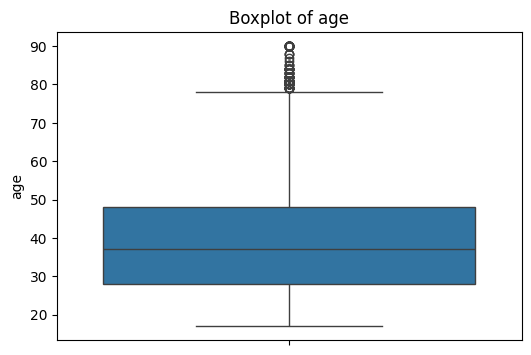

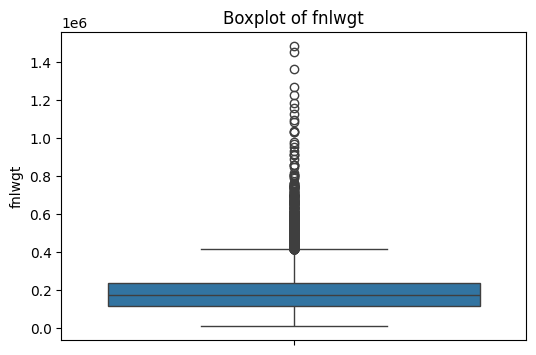

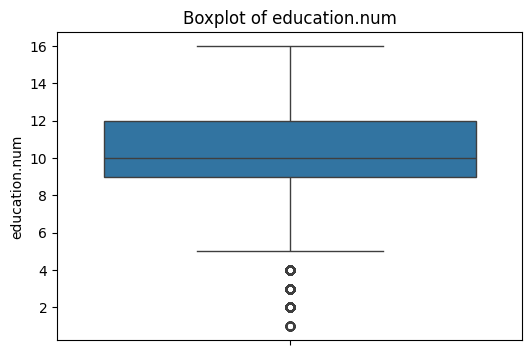

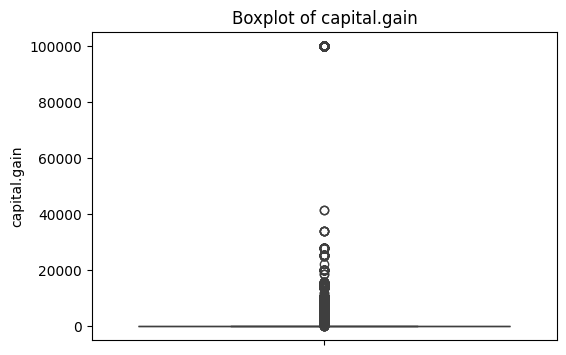

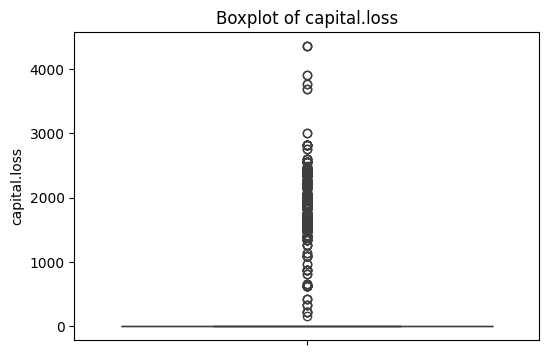

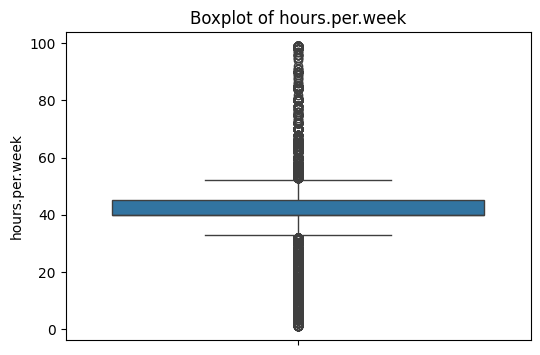

In [335]:
# List of typical integer variables in Adult dataset
int_columns = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

# Check which columns actually exist in your dataframe
existing_int_columns = [col for col in int_columns if col in data.columns]

# Plot each boxplot separately
for col in existing_int_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

In [336]:
########## Pre-processing steps starts from here ##########

### 1. Removing duplicate rows
df_adult_income = data.drop_duplicates()


In [337]:
### 2. Renaming the column name 'fnlwgt' to a better name for clear understanding 
df_adult_income = df_adult_income.rename(columns={'fnlwgt': 'population.weight'})

In [338]:
### 3. Renaming the column name 'education.num' to a better name for clear understanding 
df_adult_income = df_adult_income.rename(columns={'education.num': 'years.of.education'})

In [339]:
### 4. Completing the country names for better understanding 
df_adult_income['native.country'] = df_adult_income['native.country'].replace('South', 'South-Korea')
df_adult_income['native.country'] = df_adult_income['native.country'].replace('Hong', 'Hong-Kong')

In [340]:
### 5. Randomly modifying the column 'sex' values and then trying to fix them. 
sample_indices = df_adult_income.sample(n=2000, random_state=42).index
df_adult_income.loc[sample_indices, 'sex'] = df_adult_income.loc[sample_indices, 'sex'].replace({'Male': 'M', 'Female': 'F'})
df_adult_income['sex'] = df_adult_income['sex'].replace({'M': 'Male', 'F': 'Female'})


In [341]:
### 6. Removing country rows where values are null
# Count rows where country == '?'
num_question_mark = (df_adult_income['native.country'] == '?').sum()
print(f"Number of rows with country = '?': {num_question_mark}")

Number of rows with country = '?': 582


In [342]:
### 7. Keep only rows where the country is not '?'
df_adult_income= df_adult_income[df_adult_income['native.country'] != '?']
print(f"Shape after removing '?': {df_adult_income.shape}")

Shape after removing '?': (31955, 15)


In [343]:
### 8. Filling in missing values for the columns 'workclass' and 'occupation' using DecisionTree Classifier

df = df_adult_income.copy()

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Define features to use for prediction
features = ['education', 'marital.status', 'relationship', 'race',
            'sex', 'native.country', 'age', 'population.weight',
            'capital.gain', 'capital.loss', 'hours.per.week']

def impute_missing_column(df, target_col, features):
    df_copy = df.copy()
    
    # Encode target column
    le_target = LabelEncoder()
    
    # Split known and unknown
    df_known = df_copy[df_copy[target_col].notna()].copy()
    df_unknown = df_copy[df_copy[target_col].isna()].copy()
    
    # Drop rows where features are missing
    df_known = df_known.dropna(subset=features)
    
    # Encode target
    df_known[target_col + '_encoded'] = le_target.fit_transform(df_known[target_col])
    
    # Encode categorical features
    df_encoded = df_known[features].copy()
    for col in df_encoded.select_dtypes(include='object').columns:
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])
    
    # Train the decision tree
    tree = DecisionTreeClassifier(random_state=42)
    tree.fit(df_encoded, df_known[target_col + '_encoded'])
    
    # Prepare unknown data
    df_unknown_filled = df_unknown[features].copy()
    for col in df_unknown_filled.select_dtypes(include='object').columns:
        df_unknown_filled[col] = LabelEncoder().fit_transform(df_unknown_filled[col].fillna('Unknown'))
    
    # Fill any remaining missing numeric values (just in case)
    df_unknown_filled = df_unknown_filled.fillna(df_encoded.mean(numeric_only=True))
    
    # Predict
    preds = tree.predict(df_unknown_filled)
    
    # Fill in the original DataFrame
    df.loc[df[target_col].isna(), target_col] = le_target.inverse_transform(preds)

# Impute 'workclass'
impute_missing_column(df, 'workclass', features)

# Now, include 'workclass' as a feature to predict 'occupation'
features_with_workclass = features + ['workclass']
impute_missing_column(df, 'occupation', features_with_workclass)

print("Missing values after imputation:")
print("workclass:", df['workclass'].isna().sum())
print("occupation:", df['occupation'].isna().sum())


Missing values after imputation:
workclass: 0
occupation: 0


In [344]:
### 9. log1p (log(x+1)) to skewed variables

# Applying log1p (log(x+1)) to skewed variables
df['population.weight'] = np.log1p(df['population.weight'])
df['capital.gain'] = np.log1p(df['capital.gain'])
df['capital.loss'] = np.log1p(df['capital.loss'])



In [345]:
### 10. One hot encoding the categorical columns


categorical_cols = ['workclass', 'occupation', 'education', 'marital.status',
                    'relationship', 'race', 'sex', 'native.country']

# One-hot encode all categorical variables
# For logistic regression
df_logistic_regression = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

# For neural network
df_neural_network = pd.get_dummies(df, columns=categorical_cols, drop_first=False, dtype=int)

# Encode target variable (if it's not already numeric)
df_logistic_regression['income'] = df_logistic_regression['income'].map({'<=50K': 0, '>50K': 1})
df_neural_network['income'] = df_neural_network['income'].map({'<=50K': 0, '>50K': 1})

# Check encoded DataFrame
print(df_logistic_regression.head())
print(df_neural_network.head())

print("Encoded values in df_logistic_regression['income']:", df_logistic_regression['income'].unique())
print("Encoded values in df_neural_network['income']:", df_neural_network['income'].unique())


   age  population.weight  years.of.education  capital.gain  capital.loss  \
0   90          11.252262                   9           0.0      8.379539   
1   82          11.797134                   9           0.0      8.379539   
2   66          12.133835                  10           0.0      8.379539   
3   54          11.851966                   4           0.0      8.268988   
4   41          12.486216                  10           0.0      8.268988   

   hours.per.week  income  workclass_Local-gov  workclass_Never-worked  \
0              40       0                    0                       0   
1              18       0                    0                       0   
2              40       0                    1                       0   
3              40       0                    0                       0   
4              40       0                    0                       0   

   workclass_Private  ...  native.country_Portugal  \
0                  0  ...             

In [346]:
########## LOGISTIC REGRESSION  MODEL IMPLEMENTATION ##########

# 1. Split into features and target
X = df_logistic_regression.drop('income', axis=1)
y = df_logistic_regression['income']

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20, stratify=y)

# 3. Define pipeline: scaler + SMOTE + logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clf', LogisticRegression(max_iter=1000, random_state=96))
])

# 4. Define hyperparameters to tune
param_grid = {
    'clf__C': [0.01, 0.1, 1, 10]
}

# 5. Define 4-fold stratified cross-validation
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=10)

# 6. Use GridSearchCV to perform hyperparameter tuning with cross-validation
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='f1',            # choose metric to optimize; can also use 'accuracy', etc.
    n_jobs=-1
)

# 7. Fit GridSearchCV on training data
grid_search.fit(X_train, y_train)

# 8. Print best hyperparameter and corresponding score
print("Best hyperparameter C:", grid_search.best_params_['clf__C'])
print(f"Best cross-validated F1 score: {grid_search.best_score_:.4f}")

# 9. Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_logistic = y_pred

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\nFinal test set performance with best hyperparameters:")
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)


Best hyperparameter C: 1
Best cross-validated F1 score: 0.6732

Final test set performance with best hyperparameters:
Accuracy: 0.8025

Confusion Matrix:
[[3832 1020]
 [ 242 1297]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      4852
           1       0.56      0.84      0.67      1539

    accuracy                           0.80      6391
   macro avg       0.75      0.82      0.77      6391
weighted avg       0.85      0.80      0.81      6391



In [347]:
########## NEURAL NETWORK MODEL IMPLEMENTATION ##########


# 1. Split into features and target
X = df_neural_network.drop('income', axis=1)
y = df_neural_network['income']

# 2. Train/test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20, stratify=y)

# 3. Define pipeline: scaler + SMOTE + MLPClassifier (neural network)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clf', MLPClassifier(max_iter=1000, random_state=50))
])

# 4. Define hyperparameters to tune
param_grid = {
    'clf__hidden_layer_sizes': [(50,), (100,), (50, 50)],  # try different network sizes
    'clf__alpha': [0.0001, 0.001, 0.01],                  # regularization strength
    'clf__learning_rate_init': [0.001, 0.01]               # initial learning rate
}

# 5. Define 4-fold stratified cross-validation
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=96)

# 6. Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='f1',        # optimize for F1 score (balanced metric)
    n_jobs=-1
)

# 7. Fit GridSearchCV on training data
grid_search.fit(X_train, y_train)

# 8. Print best hyperparameters and corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print(f"Best cross-validated F1 score: {grid_search.best_score_:.4f}")

# 9. Evaluate best model on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_nn = y_pred

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\nFinal test set performance with best hyperparameters:")
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)


Best hyperparameters: {'clf__alpha': 0.01, 'clf__hidden_layer_sizes': (50,), 'clf__learning_rate_init': 0.01}
Best cross-validated F1 score: 0.6527

Final test set performance with best hyperparameters:
Accuracy: 0.8163

Confusion Matrix:
[[4002  850]
 [ 324 1215]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      4852
           1       0.59      0.79      0.67      1539

    accuracy                           0.82      6391
   macro avg       0.76      0.81      0.77      6391
weighted avg       0.84      0.82      0.82      6391



In [348]:
########## BASELINE MODEL IMPLEMENTATION ##########

baseline = DummyClassifier(strategy='most_frequent', random_state=96)
baseline.fit(X_train, y_train)
y_pred = baseline.predict(X_test)
y_pred_baseline = y_pred

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Baseline performance (predict majority class):")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Baseline performance (predict majority class):
Accuracy: 0.7592

Confusion Matrix:
[[4852    0]
 [1539    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      4852
           1       0.00      0.00      0.00      1539

    accuracy                           0.76      6391
   macro avg       0.38      0.50      0.43      6391
weighted avg       0.58      0.76      0.66      6391



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [349]:
########## MODEL COMPARISON BETWEEN LOGISTICS, NEURAL NETWORK AND BASELINE MODEL ##########

def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
    return {
        'Model': name,
        'Accuracy': round(acc, 4),
        'F1 (class 1)': round(report['1']['f1-score'], 4),
        'Recall (class 1)': round(report['1']['recall'], 4),
        'Precision (class 1)': round(report['1']['precision'], 4)
    }

results = [
    evaluate_model('Baseline (Majority)', y_test, y_pred_baseline),
    evaluate_model('Logistic Regression', y_test, y_pred_logistic),
    evaluate_model('Neural Network', y_test, y_pred_nn)
]

summary_df = pd.DataFrame(results)

print("**Comparison summary:**")
print(summary_df)


**Comparison summary:**
                 Model  Accuracy  F1 (class 1)  Recall (class 1)  \
0  Baseline (Majority)    0.7592        0.0000            0.0000   
1  Logistic Regression    0.8025        0.6727            0.8428   
2       Neural Network    0.8163        0.6743            0.7895   

   Precision (class 1)  
0               0.0000  
1               0.5598  
2               0.5884  


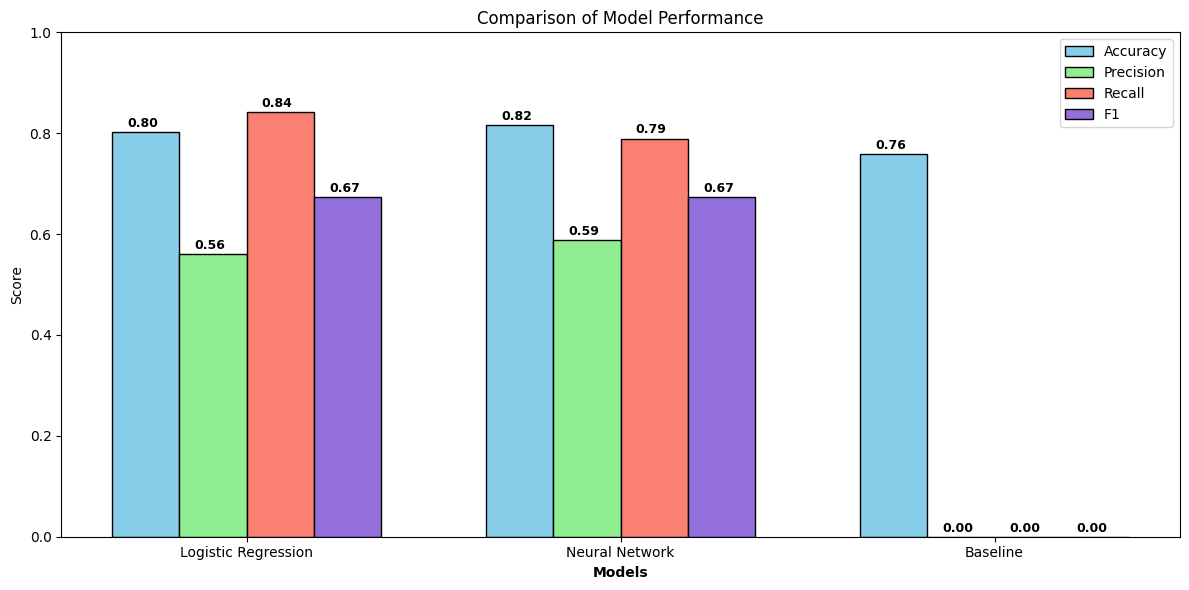

In [352]:
########## MODEL COMPARISON VISUALIZATION ##########


# Define metrics as a list of dicts for each model
results = [
    {
        'model': 'Logistic Regression',
        'accuracy': 0.8025,
        'precision': 0.5598,
        'recall': 0.8428,
        'f1': 0.6727
    },
    {
        'model': 'Neural Network',
        'accuracy': 0.8163,
        'precision': 0.5884,
        'recall': 0.7895,
        'f1': 0.6743
    },
    {
        'model': 'Baseline',
        'accuracy': 0.7592,
        'precision': 0.0000,
        'recall': 0.0000,
        'f1': 0.0000
    }
]

# Extract metric names dynamically
metric_names = ['accuracy', 'precision', 'recall', 'f1']
models = [r['model'] for r in results]

# Prepare data for each metric
metrics_values = {metric: [r[metric] for r in results] for metric in metric_names}

# Bar settings
bar_width = 0.18
positions = np.arange(len(models))
# Compute positions for each metric
all_positions = [
    [pos + i*bar_width for pos in positions]
    for i in range(len(metric_names))
]

plt.figure(figsize=(12,6))

colors = ['skyblue', 'lightgreen', 'salmon', 'mediumpurple']

# Plot each metric
for idx, metric in enumerate(metric_names):
    plt.bar(
        all_positions[idx],
        metrics_values[metric],
        color=colors[idx],
        width=bar_width,
        edgecolor='black',
        label=metric.capitalize()
    )

# Add text labels on top of bars
for idx, metric in enumerate(metric_names):
    for i, v in enumerate(metrics_values[metric]):
        plt.text(all_positions[idx][i]-0.05, v+0.01, f"{v:.2f}", fontweight='bold', fontsize=9)

# Labels and title
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Score')
plt.title('Comparison of Model Performance')
plt.xticks([pos + (bar_width*(len(metric_names)-1)/2) for pos in positions], models)
plt.ylim(0,1)
plt.legend()
plt.tight_layout()

plt.show()
